In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
from tqdm.notebook import tqdm, trange
from datetime import datetime, timezone
import seaborn as sns
import matplotlib.pyplot as plt

# Read Data

In [4]:
#custom_date_parser = lambda x: datetime.strptime(x, 'YYYY-MM-DD HH24:MM:SS')

In [5]:
df = pd.read_csv('./data/release_2_20190601-20200424_smart_meter_DATA.csv', parse_dates=['record_time'],
                 index_col='record_time')
df.head(5) 
#2019-06-07 to 2020-04-19

meter_number  meter_count  a_voltage  a_current  \
record_time                                                                  
2019-06-07 13:13:00+00:00        541806        50.07      209.8       3.03   
2019-06-07 13:17:00+00:00        541806        50.07      209.8       3.03   
2019-06-07 17:18:00+00:00        541806        50.11      203.7       1.94   
2019-06-07 17:22:00+00:00        541806        50.11      203.7       1.94   
2019-06-07 17:30:00+00:00        541806        50.17      205.4       1.88   

                           a_power  a_power_factor  frequency  
record_time                                                    
2019-06-07 13:13:00+00:00     0.44            0.87      50.43  
2019-06-07 13:17:00+00:00     0.44            0.87      50.43  
2019-06-07 17:18:00+00:00     0.37            0.94      48.80  
2019-06-07 17:22:00+00:00     0.37            0.94      48.80  
2019-06-07 17:30:00+00:00     0.36            0.94      49.36

In [6]:
df.to_csv('./data/df.csv')

In [7]:
df.columns

Index(['meter_number', 'meter_count', 'a_voltage', 'a_current', 'a_power',
       'a_power_factor', 'frequency'],
      dtype='object')

In [8]:
df.columns = ['meter_number', 'meter_count', 'voltage', 'current', 'power',
       'power_factor', 'frequency']

In [9]:
df.head(5)

meter_number  meter_count  voltage  current  power  \
record_time                                                                     
2019-06-07 13:13:00+00:00        541806        50.07    209.8     3.03   0.44   
2019-06-07 13:17:00+00:00        541806        50.07    209.8     3.03   0.44   
2019-06-07 17:18:00+00:00        541806        50.11    203.7     1.94   0.37   
2019-06-07 17:22:00+00:00        541806        50.11    203.7     1.94   0.37   
2019-06-07 17:30:00+00:00        541806        50.17    205.4     1.88   0.36   

                           power_factor  frequency  
record_time                                         
2019-06-07 13:13:00+00:00          0.87      50.43  
2019-06-07 13:17:00+00:00          0.87      50.43  
2019-06-07 17:18:00+00:00          0.94      48.80  
2019-06-07 17:22:00+00:00          0.94      48.80  
2019-06-07 17:30:00+00:00          0.94      49.36

In [10]:
len(df.meter_number.unique())

216

In [14]:
df_2 = pd.read_csv('./data/stellar_dump_nigeria_200401-211027.csv', parse_dates=['timestamp_utc'],
                 index_col='timestamp_utc')
df_2.head(5)
#2020-06-03 to 2021-10-27

account_id  meter_number region_timezone   region  \
timestamp_utc                                                                  
2020-06-03 07:35:00+00:00           9        541810    Africa/Lagos  Nigeria   
2020-06-03 07:40:00+00:00           9        541810    Africa/Lagos  Nigeria   
2020-06-03 07:45:00+00:00           9        541810    Africa/Lagos  Nigeria   
2020-06-03 07:50:00+00:00           9        541810    Africa/Lagos  Nigeria   
2020-06-03 07:55:00+00:00           9        541810    Africa/Lagos  Nigeria   

                           energy  voltage  current  power  power_factor  \
timestamp_utc                                                              
2020-06-03 07:35:00+00:00     2.3    224.8      0.0    0.0           1.0   
2020-06-03 07:40:00+00:00     2.3    224.5      0.0    0.0           1.0   
2020-06-03 07:45:00+00:00     2.3    222.2      0.0    0.0           1.0   
2020-06-03 07:50:00+00:00     2.3    222.1      0.0    0.0           1.0   
2020-06-03 07:55:00+00:00     2.3    220.5      0.0    0.0           1.0   

                           frequency  
timestamp_utc                         
2020-06-03 07:35:00+00:00      50.29  
2020-06-03 07:40:00+00:00      50.28  
2020-06-03 07:45:00+00:00      50.30  
2020-06-03 07:50:00+00:00      50.28  
2020-06-03 07:55:00+00:00      50.20

In [15]:
df_2.to_csv('./data/df_2.csv')

In [16]:
df_2.columns

Index(['account_id', 'meter_number', 'region_timezone', 'region', 'energy',
       'voltage', 'current', 'power', 'power_factor', 'frequency'],
      dtype='object')

In [17]:
df_2.columns = ['account_id', 'meter_number', 'region_timezone', 'region', 'meter_count',
       'voltage', 'current', 'power', 'power_factor', 'frequency']

In [18]:
df_2.head(1)

account_id  meter_number region_timezone   region  \
timestamp_utc                                                                  
2020-06-03 07:35:00+00:00           9        541810    Africa/Lagos  Nigeria   

                           meter_count  voltage  current  power  power_factor  \
timestamp_utc                                                                   
2020-06-03 07:35:00+00:00          2.3    224.8      0.0    0.0           1.0   

                           frequency  
timestamp_utc                         
2020-06-03 07:35:00+00:00      50.29

In [19]:
len(df_2.meter_number.unique())

85

In [20]:
df_merge = df.append(df_2)

In [21]:
df_merge = df_merge[['meter_number', 'meter_count', 'voltage', 'current', 'power', 'power_factor', 'frequency']]
df_merge.head(5)
#2019-06-07 to 2020-04-19 - 2020-06-03 to 2021-10-27 missing May 2020

meter_number  meter_count  voltage  current  power  \
2019-06-07 13:13:00+00:00        541806        50.07    209.8     3.03   0.44   
2019-06-07 13:17:00+00:00        541806        50.07    209.8     3.03   0.44   
2019-06-07 17:18:00+00:00        541806        50.11    203.7     1.94   0.37   
2019-06-07 17:22:00+00:00        541806        50.11    203.7     1.94   0.37   
2019-06-07 17:30:00+00:00        541806        50.17    205.4     1.88   0.36   

                           power_factor  frequency  
2019-06-07 13:13:00+00:00          0.87      50.43  
2019-06-07 13:17:00+00:00          0.87      50.43  
2019-06-07 17:18:00+00:00          0.94      48.80  
2019-06-07 17:22:00+00:00          0.94      48.80  
2019-06-07 17:30:00+00:00          0.94      49.36

In [22]:
df_merge.shape

(3069760, 7)

In [23]:
df_merge.index.names = ['timestamp_utc']

In [24]:
df_merge.head(1)

meter_number  meter_count  voltage  current  power  \
timestamp_utc                                                                   
2019-06-07 13:13:00+00:00        541806        50.07    209.8     3.03   0.44   

                           power_factor  frequency  
timestamp_utc                                       
2019-06-07 13:13:00+00:00          0.87      50.43

In [25]:
df_merge.index = df_merge.index.tz_convert(None)

In [26]:
df_merge.to_csv('./data/df_merge.csv')

# Data Wrangling

In [1037]:
df_fe=df_merge.copy()
len(df_fe)

3069760

0,635 kva to kw is: times pf 0.87 = 0.553 to kwh is: times 60*60= 1990 kwh

In [1038]:
#df_fe.loc[df_fe['meter_count']==0].index

In [1039]:
#df_fe.loc[df_fe['a_power']==0].head(5)

In [1040]:
#df_fe = df_fe.drop(df_fe[df_fe.meter_count==0].index)
#len(df_fe)

In [1041]:
df_fe['year']=df_fe.index.year
df_fe['month']=df_fe.index.month
df_fe['day']=df_fe.index.day
df_fe['hour']=df_fe.index.hour
df_fe['minute']=df_fe.index.minute
df_fe['apparent_energy_kVAh']=round((df_fe.voltage * df_fe.current)/1000, 2) 
df_fe['active_energy_kWh']=round((df_fe.voltage * df_fe.current * df_fe.power_factor)/1000, 2) 
#here it is power in kWh but after resampling 60 min it is energy kWh

In [1042]:
df_fe.head(5)

meter_number  meter_count  voltage  current  power  \
timestamp_utc                                                             
2019-06-07 13:13:00        541806        50.07    209.8     3.03   0.44   
2019-06-07 13:17:00        541806        50.07    209.8     3.03   0.44   
2019-06-07 17:18:00        541806        50.11    203.7     1.94   0.37   
2019-06-07 17:22:00        541806        50.11    203.7     1.94   0.37   
2019-06-07 17:30:00        541806        50.17    205.4     1.88   0.36   

                     power_factor  frequency  year  month  day  hour  minute  \
timestamp_utc                                                                  
2019-06-07 13:13:00          0.87      50.43  2019      6    7    13      13   
2019-06-07 13:17:00          0.87      50.43  2019      6    7    13      17   
2019-06-07 17:18:00          0.94      48.80  2019      6    7    17      18   
2019-06-07 17:22:00          0.94      48.80  2019      6    7    17      22   
2019-06-07 17:30:00          0.94      49.36  2019      6    7    17      30   

                     apparent_energy_kVAh  active_energy_kWh  
timestamp_utc                                                 
2019-06-07 13:13:00                  0.64               0.55  
2019-06-07 13:17:00                  0.64               0.55  
2019-06-07 17:18:00                  0.40               0.37  
2019-06-07 17:22:00                  0.40               0.37  
2019-06-07 17:30:00                  0.39               0.36

In [1043]:
df_fe = df_fe.groupby(by='timestamp_utc').mean()
df_fe.head(5)

meter_number  meter_count  voltage  current  power  \
timestamp_utc                                                             
2019-06-01 00:00:00      541955.0          NaN  203.460    2.230   0.40   
2019-06-01 00:01:00      541907.0          NaN  180.070    2.520   0.40   
2019-06-01 00:05:00      541921.0          NaN  219.820    8.170   1.58   
2019-06-01 00:07:00      541947.0          NaN  207.490    1.970   0.36   
2019-06-01 00:08:00      541931.0          NaN  193.765    2.355   0.40   

                     power_factor  frequency    year  month  day  hour  \
timestamp_utc                                                            
2019-06-01 00:00:00          0.88        0.0  2019.0    6.0  1.0   0.0   
2019-06-01 00:01:00          0.88        0.0  2019.0    6.0  1.0   0.0   
2019-06-01 00:05:00          0.88        0.0  2019.0    6.0  1.0   0.0   
2019-06-01 00:07:00          0.88        0.0  2019.0    6.0  1.0   0.0   
2019-06-01 00:08:00          0.88        0.0  2019.0    6.0  1.0   0.0   

                     minute  apparent_energy_kVAh  active_energy_kWh  
timestamp_utc                                                         
2019-06-01 00:00:00     0.0                 0.450               0.40  
2019-06-01 00:01:00     1.0                 0.450               0.40  
2019-06-01 00:05:00     5.0                 1.800               1.58  
2019-06-01 00:07:00     7.0                 0.410               0.36  
2019-06-01 00:08:00     8.0                 0.455               0.40

In [1044]:
df_fe.shape

(420820, 14)

In [1045]:
df_fe = df_fe.resample('60Min').mean().round(2)
df_fe.shape

(21111, 14)

In [1053]:
df_fe['month_str']=df_fe.index.strftime("%b")
df_fe.head(5)

meter_number  meter_count  voltage  current  power  \
timestamp_utc                                                             
2019-06-01 00:00:00     541936.22          NaN   203.13     3.44   0.63   
2019-06-01 01:00:00     541951.57          NaN   205.87     2.11   0.38   
2019-06-01 02:00:00     541950.06          NaN   207.27     2.06   0.38   
2019-06-01 03:00:00     541947.00          NaN   209.89     1.95   0.36   
2019-06-01 04:00:00     541947.00          NaN   209.69     1.95   0.36   

                     power_factor  frequency    year  month  day  hour  \
timestamp_utc                                                            
2019-06-01 00:00:00          0.88        0.0  2019.0    6.0  1.0   0.0   
2019-06-01 01:00:00          0.88        0.0  2019.0    6.0  1.0   1.0   
2019-06-01 02:00:00          0.88        0.0  2019.0    6.0  1.0   2.0   
2019-06-01 03:00:00          0.88        0.0  2019.0    6.0  1.0   3.0   
2019-06-01 04:00:00          0.88        0.0  2019.0    6.0  1.0   4.0   

                     minute  apparent_energy_kVAh  active_energy_kWh month_str  
timestamp_utc                                                                   
2019-06-01 00:00:00   27.22                  0.72               0.63       Jun  
2019-06-01 01:00:00   30.57                  0.43               0.38       Jun  
2019-06-01 02:00:00   27.71                  0.43               0.38       Jun  
2019-06-01 03:00:00   26.00                  0.41               0.36       Jun  
2019-06-01 04:00:00   26.20                  0.41               0.36       Jun

In [1054]:
df_fe.isna().sum()

meter_number            3785
meter_count             3840
voltage                 3785
current                 3797
power                   6056
power_factor            6070
frequency               3785
year                    3785
month                   3785
day                     3785
hour                    3785
minute                  3785
apparent_energy_kVAh    3797
active_energy_kWh       6079
month_str                  0
dtype: int64

In [1055]:
#df_fe.dropna(inplace=True)
#df_fe.isna().sum()

In [1056]:
df_fe[df_fe['year']==2020]['month'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [1057]:
df_fe[df_fe.active_energy_kWh.isna()].index.unique()

DatetimeIndex(['2019-06-01 10:00:00', '2019-06-01 11:00:00',
               '2019-06-01 12:00:00', '2019-06-01 13:00:00',
               '2019-06-01 14:00:00', '2019-06-01 15:00:00',
               '2019-06-01 16:00:00', '2019-06-01 17:00:00',
               '2019-06-01 18:00:00', '2019-06-01 19:00:00',
               ...
               '2021-10-24 23:00:00', '2021-10-25 00:00:00',
               '2021-10-25 01:00:00', '2021-10-25 02:00:00',
               '2021-10-25 03:00:00', '2021-10-25 04:00:00',
               '2021-10-25 05:00:00', '2021-10-25 06:00:00',
               '2021-10-26 02:00:00', '2021-10-26 03:00:00'],
              dtype='datetime64[ns]', name='timestamp_utc', length=6079, freq=None)

<AxesSubplot:>

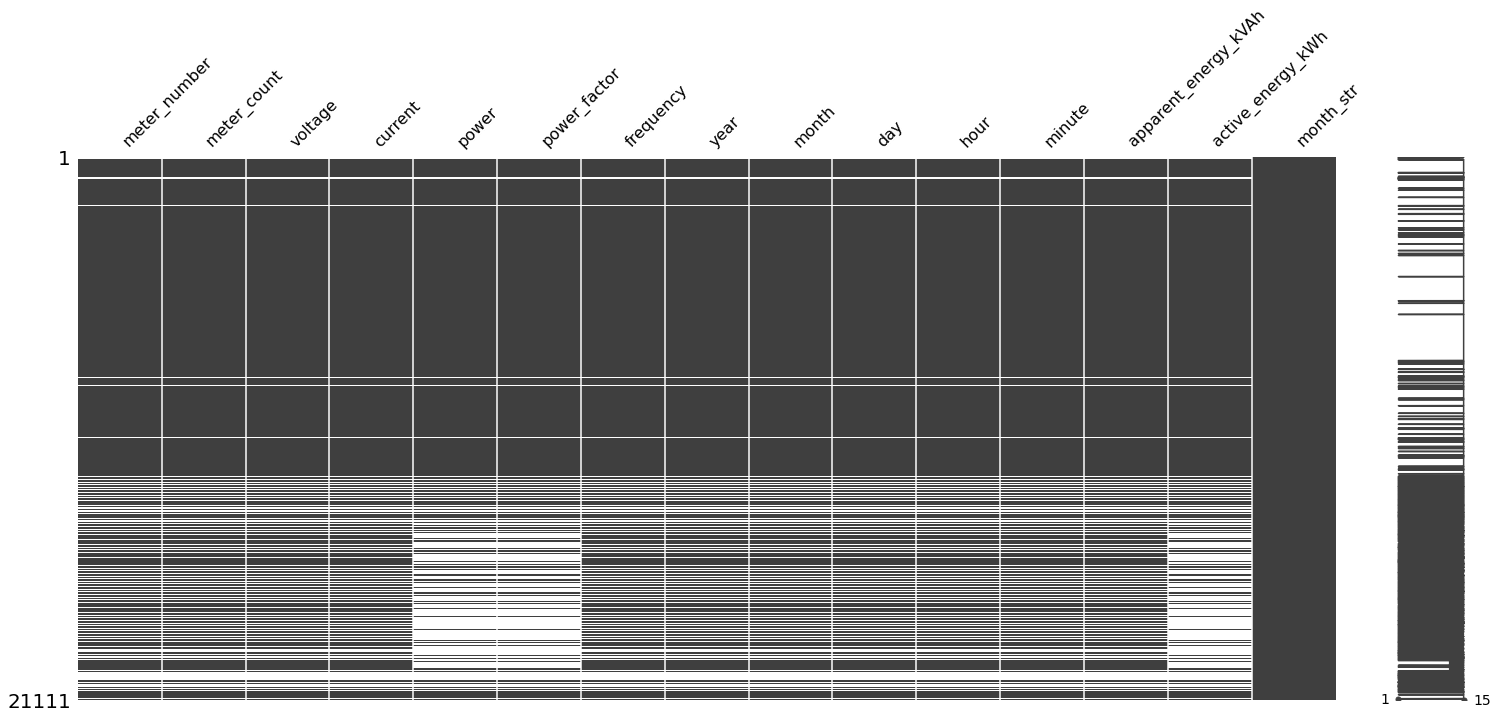

In [1058]:
import missingno as msno
msno.matrix(df_fe)

<AxesSubplot:>

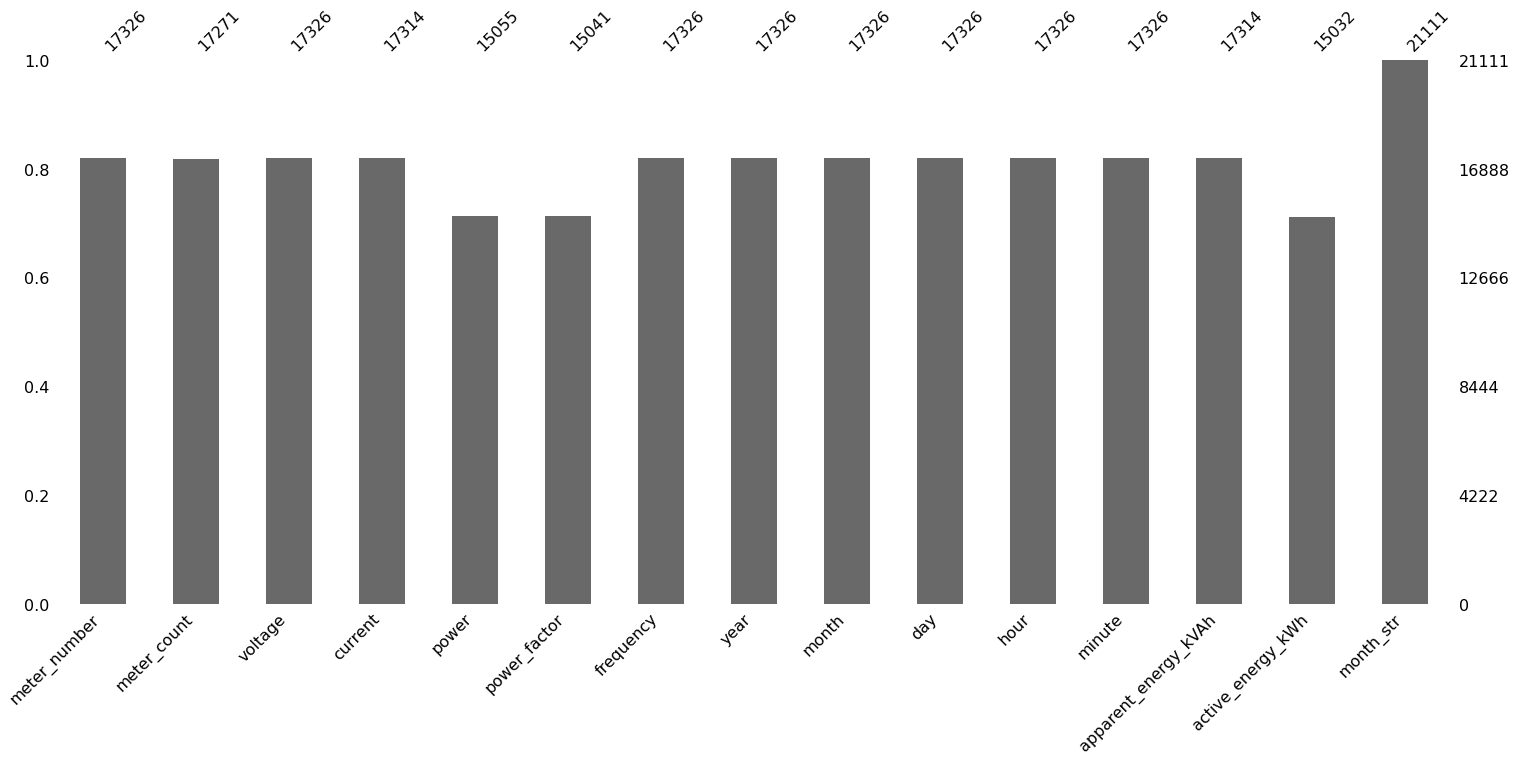

In [1059]:
msno.bar(df_fe)

<AxesSubplot:>

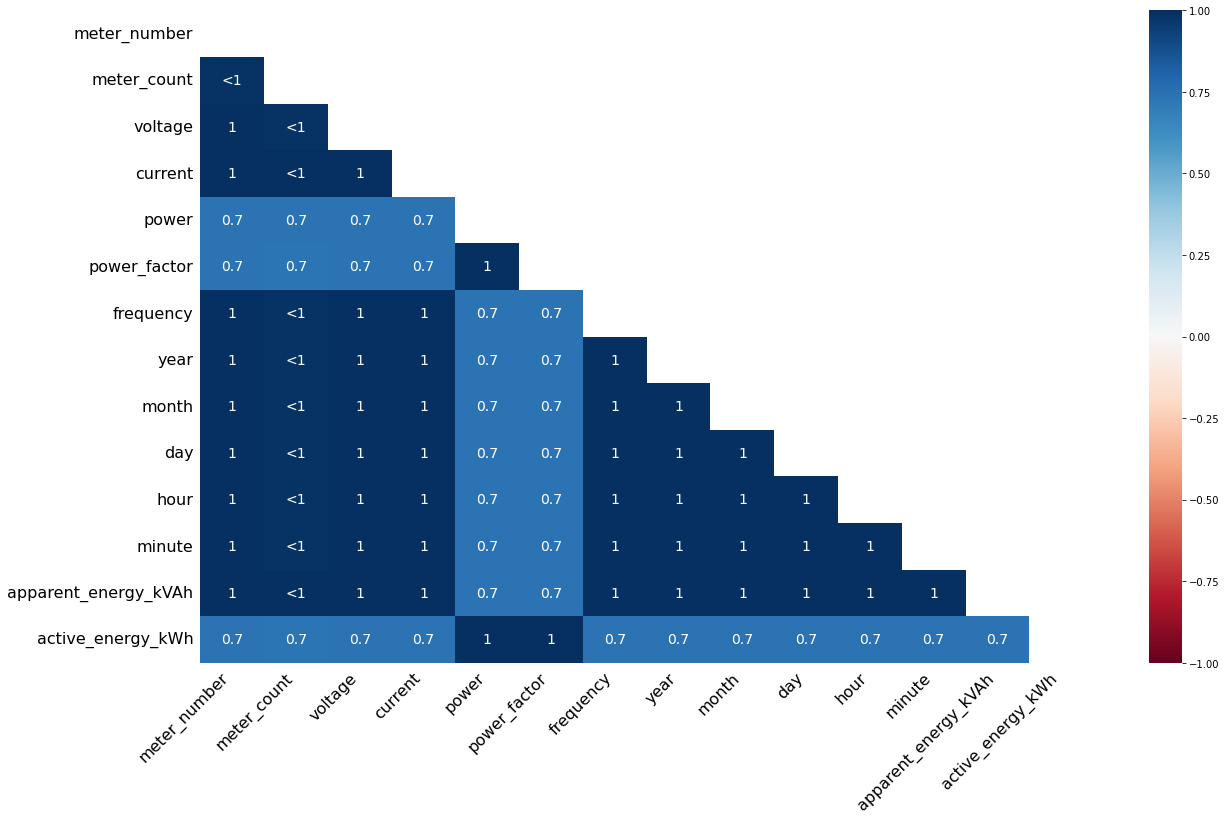

In [1060]:
msno.heatmap(df_fe)

<AxesSubplot:>

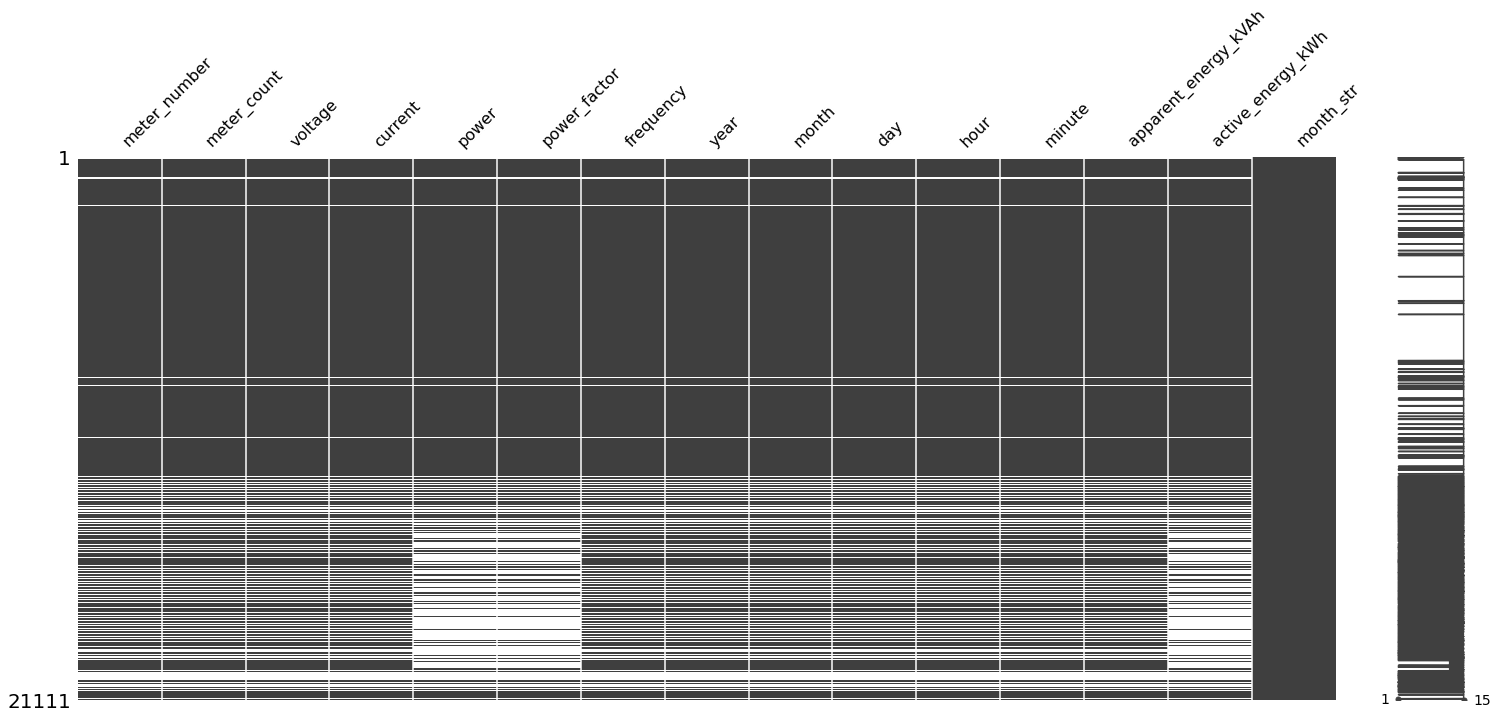

In [1061]:
msno.matrix(df_fe)

<AxesSubplot:ylabel='timestamp_utc'>

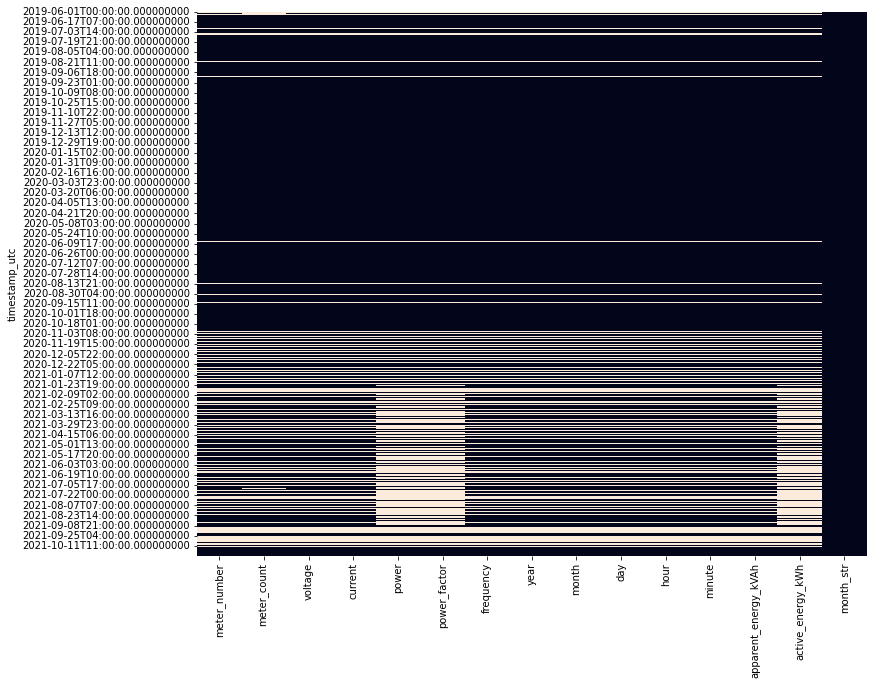

In [1062]:
plt.figure(figsize=(12,10))

sns.heatmap(df_fe.isnull(), cbar=False)

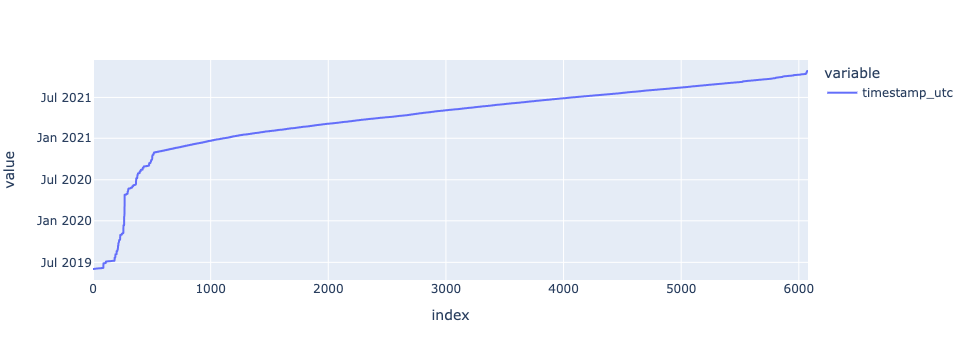

In [1063]:
px.line(df_fe[df_fe.active_energy_kWh.isna()].index)

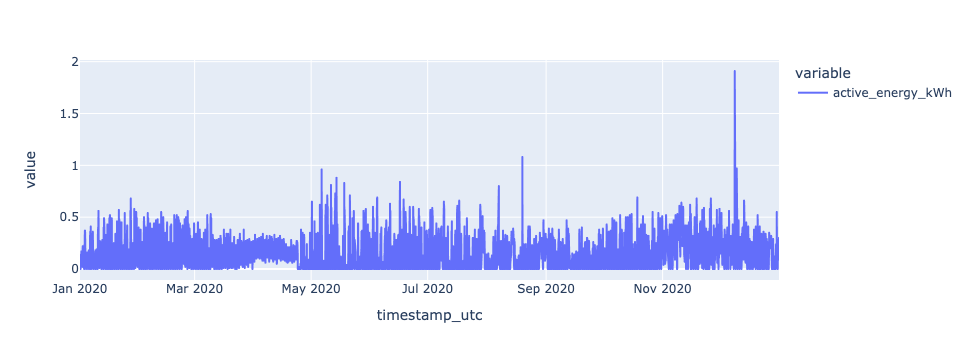

In [1064]:
px.line(df_fe[df_fe['year']==2020]['active_energy_kWh'])

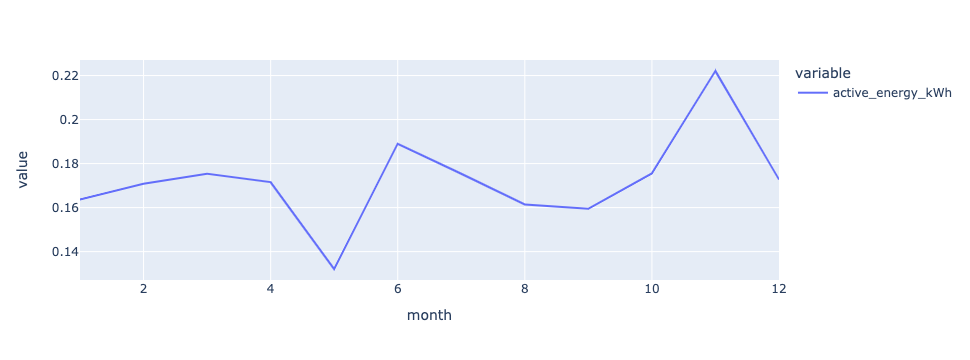

In [1065]:
px.line(df_fe.groupby(by='month').mean()['active_energy_kWh']) #show seasons

In [1066]:
df_fe.groupby(by='hour').mean() #non relevant as days are diffferent by months and seasons

meter_number  meter_count     voltage   current     power  \
hour                                                               
0.0   541926.344821    85.599508  219.564953  0.377514  0.069605   
1.0   541929.260725    84.651804  220.581698  0.357691  0.066220   
2.0   541933.549465    82.192154  222.618126  0.337189  0.062760   
3.0   541928.289347    83.057027  223.478253  0.327850  0.061583   
4.0   541927.485447    74.536908  223.540545  0.286829  0.054728   
5.0   541921.110272    65.812754  224.042835  0.232330  0.043818   
6.0   541934.163895   168.628620  219.695312  0.439476  0.071608   
7.0   541964.148972   264.161325  216.008837  0.732607  0.134779   
8.0   541954.284970   314.053124  211.420590  0.963634  0.179245   
9.0   541947.560119   343.076181  209.332369  1.184750  0.211387   
10.0  541933.188007   337.300849  207.955453  1.242470  0.223701   
11.0  541933.729276   330.502957  207.029015  1.279075  0.227568   
12.0  541930.755609   331.056178  206.536370  1.332178  0.238737   
13.0  541930.920718   333.310637  206.855418  1.371837  0.248983   
14.0  541929.638642   347.991891  206.785466  1.409976  0.255386   
15.0  541930.688980   355.086764  207.292309  1.402169  0.257909   
16.0  541932.623419   351.037151  208.054262  1.357904  0.247477   
17.0  541929.364751   409.948270  208.170391  1.447370  0.256915   
18.0  541925.025584   496.357614  205.863235  1.559545  0.272066   
19.0  541915.494027   513.196135  206.389015  1.360400  0.220917   
20.0  541905.489433   481.394371  209.502355  1.071052  0.167169   
21.0  541903.505200   394.611399  209.624966  0.811856  0.129468   
22.0  541924.954526   137.636421  214.407907  0.520233  0.091289   
23.0  541931.089017    86.320777  216.778091  0.410682  0.075876   

      power_factor  frequency         year     month        day     minute  \
hour                                                                         
0.0       0.951146  49.719755  2019.711864  6.979284  15.826742  28.078493   
1.0       0.953240  49.881565  2019.700382  6.975191  15.832061  27.935916   
2.0       0.955600  49.885335  2019.695985  6.973231  15.810707  28.198107   
3.0       0.959639  49.907524  2019.696737  6.992322  15.788868  27.817754   
4.0       0.964044  49.801284  2019.688716  7.023346  15.838521  27.984047   
5.0       0.967717  49.774000  2019.697087  7.025243  15.899029  27.882097   
6.0       0.961556  49.062153  2019.953258  6.886686  15.570822  33.864788   
7.0       0.941069  47.912289  2020.052632  6.730722  15.772338  28.896047   
8.0       0.929815  47.450289  2020.064982  6.730445  15.791817  28.283586   
9.0       0.916052  47.108667  2020.066667  6.705952  15.789286  27.924667   
10.0      0.913787  47.172255  2020.071599  6.700477  15.855609  27.989308   
11.0      0.912892  46.928304  2020.078292  6.702254  15.833926  28.024413   
12.0      0.911012  46.895878  2020.090164  6.716628  15.792740  27.894754   
13.0      0.909262  46.794547  2020.085984  6.698469  15.798587  27.909611   
14.0      0.908176  46.646411  2020.088548  6.709563  15.847698  27.897119   
15.0      0.909363  46.607749  2020.094959  6.715123  15.805393  27.838230   
16.0      0.913157  46.792213  2020.093677  6.703747  15.776347  27.666569   
17.0      0.914130  47.329455  2020.090047  6.700237  15.851896  27.046126   
18.0      0.914476  47.966925  2020.070111  6.680197  15.799508  27.438216   
19.0      0.921718  48.155748  2020.072319  6.634663  15.763092  27.596022   
20.0      0.928695  48.808917  2020.060453  6.625945  15.725441  26.945831   
21.0      0.936046  48.933062  2019.994483  6.628966  15.834483  24.175379   
22.0      0.943223  49.456619  2019.769231  6.944544  16.048301  26.507335   
23.0      0.947869  49.544008  2019.716446  6.962193  15.862004  27.667788   

      apparent_energy_kVAh  active_energy_kWh  
hour                                           
0.0               0.078475           0.069486  
1.0               0.074332           0.065960  
2.0              

In [1067]:
df_fe.head(5)

meter_number  meter_count  voltage  current  power  \
timestamp_utc                                                             
2019-06-01 00:00:00     541936.22          NaN   203.13     3.44   0.63   
2019-06-01 01:00:00     541951.57          NaN   205.87     2.11   0.38   
2019-06-01 02:00:00     541950.06          NaN   207.27     2.06   0.38   
2019-06-01 03:00:00     541947.00          NaN   209.89     1.95   0.36   
2019-06-01 04:00:00     541947.00          NaN   209.69     1.95   0.36   

                     power_factor  frequency    year  month  day  hour  \
timestamp_utc                                                            
2019-06-01 00:00:00          0.88        0.0  2019.0    6.0  1.0   0.0   
2019-06-01 01:00:00          0.88        0.0  2019.0    6.0  1.0   1.0   
2019-06-01 02:00:00          0.88        0.0  2019.0    6.0  1.0   2.0   
2019-06-01 03:00:00          0.88        0.0  2019.0    6.0  1.0   3.0   
2019-06-01 04:00:00          0.88        0.0  2019.0    6.0  1.0   4.0   

                     minute  apparent_energy_kVAh  active_energy_kWh month_str  
timestamp_utc                                                                   
2019-06-01 00:00:00   27.22                  0.72               0.63       Jun  
2019-06-01 01:00:00   30.57                  0.43               0.38       Jun  
2019-06-01 02:00:00   27.71                  0.43               0.38       Jun  
2019-06-01 03:00:00   26.00                  0.41               0.36       Jun  
2019-06-01 04:00:00   26.20                  0.41               0.36       Jun

In [1068]:
df_fe.groupby(['month'])['active_energy_kWh'].mean()

month
1.0     0.163648
2.0     0.170880
3.0     0.175427
4.0     0.171584
5.0     0.132100
6.0     0.188937
7.0     0.175383
8.0     0.161406
9.0     0.159463
10.0    0.175508
11.0    0.222057
12.0    0.172779
Name: active_energy_kWh, dtype: float64

In [1069]:
df_fe.month.unique()

array([ 6., nan,  7.,  8.,  9., 10., 11., 12.,  1.,  2.,  3.,  4.,  5.])

Text(0.5, 0, 'Hour')

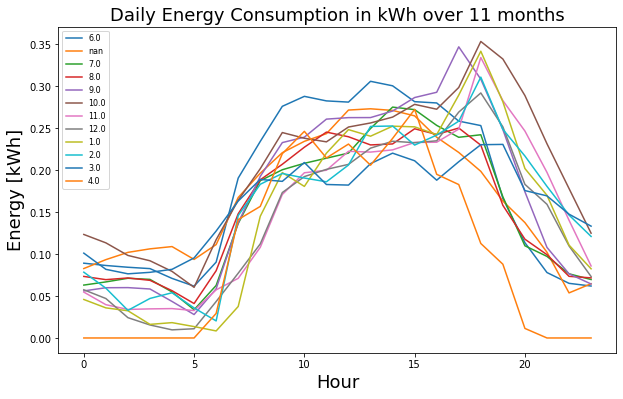

In [1075]:
plt.figure(figsize=(10,6))

for month in df_fe.month.unique():
    try:
        df_fe.groupby(['month', 'hour'])['active_energy_kWh'].mean()[month].plot()
    except:
        continue
plt.legend(df_fe.month.unique(), fontsize=8)
plt.title('Daily Energy Consumption in kWh over 11 months', fontsize=18)
plt.ylabel('Energy [kWh]', fontsize=18)
plt.xlabel('Hour', fontsize=18)

In [1079]:
df_fe.groupby(['hour', 'month_str'])['active_energy_kWh'].mean().unstack().head(5)

month_str       Apr       Aug       Dec       Feb       Jan       Jul  \
hour                                                                    
0.0        0.101071  0.063019  0.054667  0.045862  0.057419  0.082727   
1.0        0.081786  0.066792  0.039667  0.035862  0.047000  0.093333   
2.0        0.076429  0.071132  0.034000  0.032414  0.024194  0.102000   
3.0        0.078214  0.069811  0.034667  0.016207  0.015484  0.106182   
4.0        0.081786  0.054808  0.035000  0.018276  0.009677  0.108889   

month_str       Jun       Mar  May       Nov       Oct       Sep  
hour                                                              
0.0        0.089091  0.078387  0.0  0.123333  0.056053  0.073333  
1.0        0.086364  0.059355  0.0  0.113333  0.059861  0.069500  
2.0        0.084259  0.032903  0.0  0.098333  0.060000  0.071500  
3.0        0.082642  0.047097  0.0  0.092000  0.058356  0.068667  
4.0        0.070980  0.053871  0.0  0.079333  0.043514  0.056333

Text(0.5, 0, 'Hour')

<Figure size 864x864 with 0 Axes>

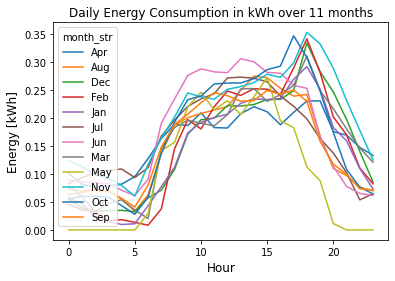

In [1078]:
plt.figure(figsize=(12,12))

df_fe.groupby(['hour', 'month_str'])['active_energy_kWh'].mean().unstack().plot()
#plt.legend(df_fe.month.unique(), fontsize=12)
plt.title('Daily Energy Consumption in kWh over 11 months', fontsize=12)
plt.ylabel('Energy [kWh]', fontsize=12)
plt.xlabel('Hour', fontsize=12)

# EDA

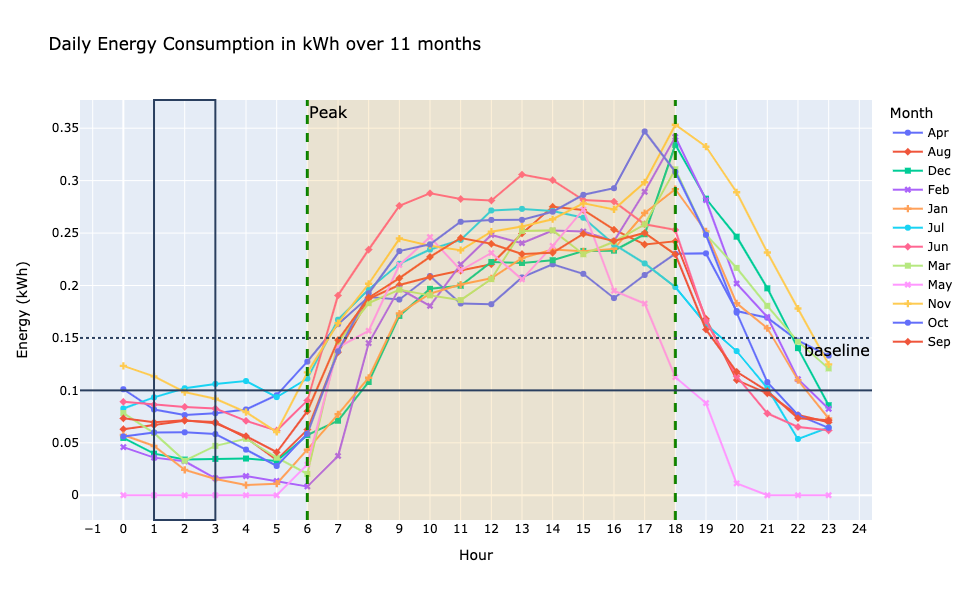

In [1100]:
#very relevant

fig = px.line(df_fe.groupby(['hour', 'month_str'])['active_energy_kWh'].mean().unstack(),
              title='Daily Energy Consumption in kWh over 11 months',
              labels={"value": "Energy (kWh)", "hour": "Hour", "month_str": "Month"},
              markers=True,
              symbol="month_str")
                #,trendline="ols", 
                #trendline_scope="overall"
                #,animation_frame="month_str"
                #facet_col="company", facet_col_wrap=2

fig.update_layout(
    autosize=False,
    width=950,
    height=600,
    font=dict(
        #family="Courier New, monospace",
        size=12,
        color="Black"),
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 0,
        dtick = 1))

fig.add_vline(x=6, line_width=3, line_dash="dash", line_color="green")
fig.add_vline(x=18, line_width=3, line_dash="dash", line_color="green")

fig.add_hline(y=0.15, line_dash="dot",
              annotation_text="baseline", 
              annotation_position="bottom right",
              annotation_font_size=16,
              annotation_font_color="black")

#fig.add_hrect(y0=0.15, y1=0.35, line_width=0, fillcolor="green", opacity=0.15,
              #annotation_text="Peak",
              #annotation_position="top right",
              #annotation=dict(font_size=20))
                              #font_family="Times New Roman")
    
fig.add_vrect(x0=6, x1=18, 
              annotation_text="Peak", annotation_position="top left",
              annotation=dict(font_size=16),# font_family="Times New Roman"),
              fillcolor="orange", opacity=0.15, line_width=0)

#fig.update_yaxes(
        #title_text = "Temperature",
        #title_standoff = 25)

fig.add_hline(y=0.1)
fig.add_vrect(x0=1, x1=3)

In [1157]:
df_fe.groupby(['month_str'])['current'].count()

month_str
Apr    1146
Aug    1882
Dec    1184
Feb    1138
Jan    1188
Jul    1821
Jun    1747
Mar    1264
May    1186
Nov    1152
Oct    1852
Sep    1754
Name: current, dtype: int64

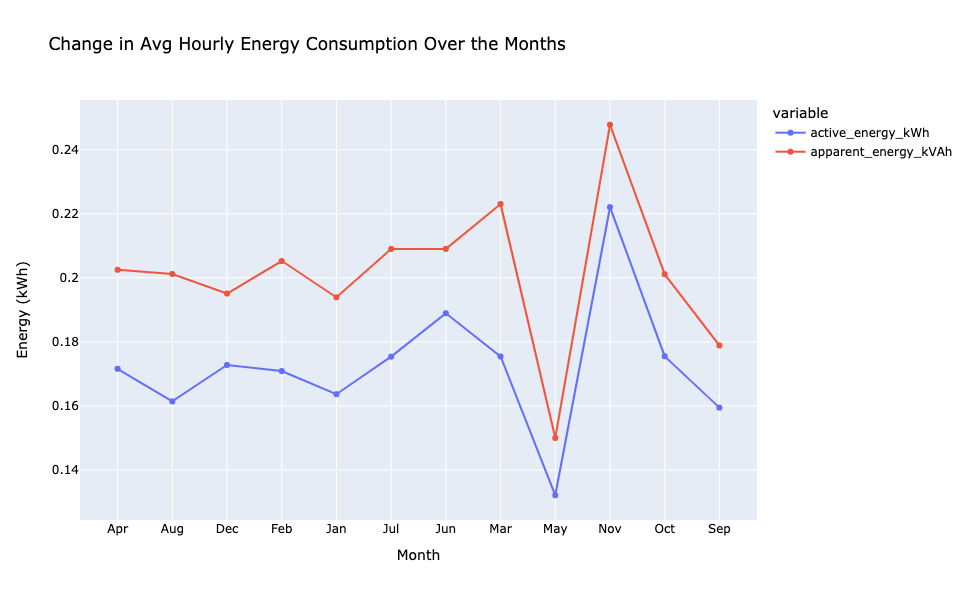

In [1155]:
#very relevant

fig = px.line(df_fe.groupby(['month_str'])[['active_energy_kWh', 'apparent_energy_kVAh']].mean(),
              title='Change in Avg Hourly Energy Consumption Over the Months',
              labels={"value": "Energy (kWh)", "hour": "Hour", "month_str": "Month"},
              markers=True)#,
              #symbol="month_str")
                #,trendline="ols", 
                #trendline_scope="overall"
                #,animation_frame="month_str"
                #facet_col="company", facet_col_wrap=2

fig.update_layout(
    autosize=False,
    width=950,
    height=600,
    font=dict(
        #family="Courier New, monospace",
        size=12,
        color="Black"),
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 0,
        dtick = 1))

In [1165]:
df_fe[['active_energy_kWh', 'apparent_energy_kVAh', 'year']]

active_energy_kWh  apparent_energy_kVAh    year
timestamp_utc                                                       
2019-06-01 00:00:00               0.63                  0.72  2019.0
2019-06-01 01:00:00               0.38                  0.43  2019.0
2019-06-01 02:00:00               0.38                  0.43  2019.0
2019-06-01 03:00:00               0.36                  0.41  2019.0
2019-06-01 04:00:00               0.36                  0.41  2019.0
...                                ...                   ...     ...
2021-10-27 10:00:00               0.29                  0.32  2021.0
2021-10-27 11:00:00               0.16                  0.18  2021.0
2021-10-27 12:00:00               0.00                  0.00  2021.0
2021-10-27 13:00:00               0.00                  0.00  2021.0
2021-10-27 14:00:00               0.08                  0.11  2021.0

[21111 rows x 3 columns]

In [1174]:
df_fe.dropna().shape

(15001, 15)

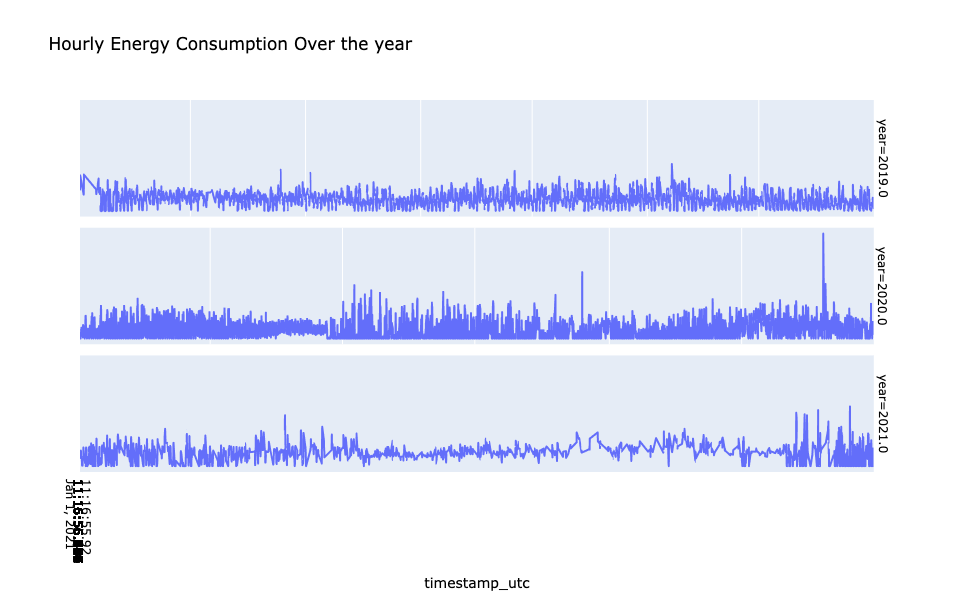

In [1191]:
#very relevant

px.line(df_fe.dropna(), y='apparent_energy_kVAh',
              title='Hourly Energy Consumption Over the year',#,
              #labels={"value": "Energy (kWh)", "hour": "Hour", "month_str": "Month"},
              #markers=True,
              #symbol="month_str")
                #,trendline="ols", 
                #trendline_scope="overall"
                #,animation_frame="month_str"
             facet_row='year')

#fig.update_layout(
#    autosize=False,
#    width=950,
#    height=600,
#    font=dict(
#        #family="Courier New, monospace",
#        size=12,
#        color="Black"),
#    xaxis = dict(
#        tickmode = 'linear',
#        tick0 = 0,
#        dtick = 1))

#fig.update_layout(
#    yaxis = dict(tickfont = dict(size=8)))
fig.update_yaxes(visible=False, showticklabels=False)
fig.update_xaxes(matches=None)

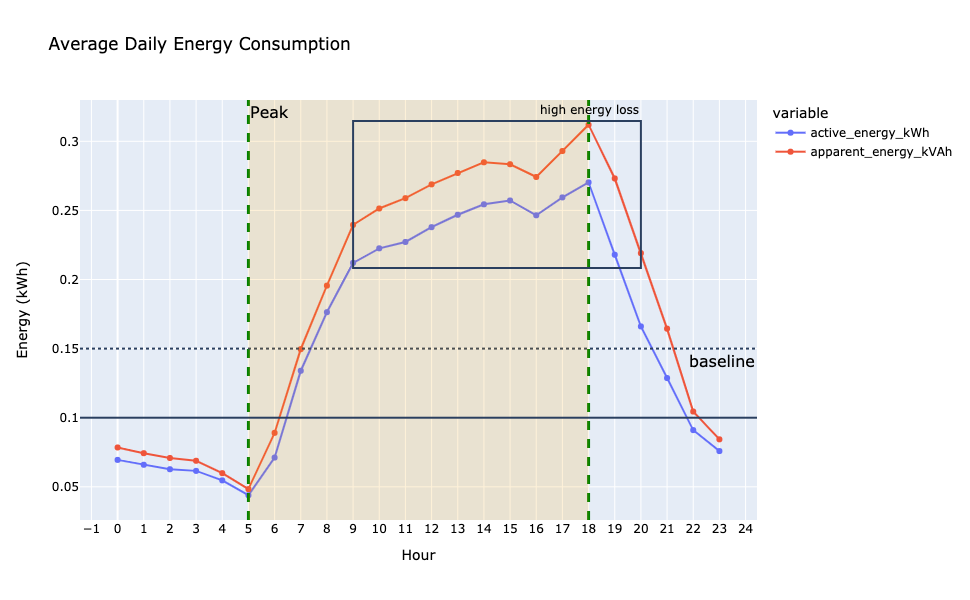

In [1137]:
#very relevant

fig = px.line(df_fe.groupby(['hour'])[['active_energy_kWh', 'apparent_energy_kVAh']].mean(),
              title='Average Daily Energy Consumption',
              labels={"value": "Energy (kWh)", "hour": "Hour", "month_str": "Month"},
              markers=True)#,
              #symbol="hour")
                #,trendline="ols", 
                #trendline_scope="overall"
                #,animation_frame="month_str"
                #facet_col="company", facet_col_wrap=2

fig.update_layout(
    autosize=False,
    width=950,
    height=600,
    font=dict(
        #family="Courier New, monospace",
        size=12,
        color="Black"),
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 0,
        dtick = 1))

fig.add_vline(x=5, line_width=3, line_dash="dash", line_color="green")
fig.add_vline(x=18, line_width=3, line_dash="dash", line_color="green")

fig.add_hline(y=0.15, line_dash="dot",
              annotation_text="baseline", 
              annotation_position="bottom right",
              annotation_font_size=16,
              annotation_font_color="black")

#fig.add_hrect(y0=0.15, y1=0.35, line_width=0, fillcolor="green", opacity=0.15,
              #annotation_text="Peak",
              #annotation_position="top right",
              #annotation=dict(font_size=20))
                              #font_family="Times New Roman")
    
fig.add_vrect(x0=5, x1=18, 
              annotation_text="Peak", annotation_position="top left",
              annotation=dict(font_size=16),# font_family="Times New Roman"),
              fillcolor="orange", opacity=0.15, line_width=0)

#fig.update_yaxes(
        #title_text = "Temperature",
        #title_standoff = 25)

fig.add_hline(y=0.1)
fig.add_vrect(x0=9, x1=20, y0=0.6, y1=0.95, annotation_text='high energy loss')

In [1083]:
df_fe.groupby(['month_str', 'hour'])['active_energy_kWh'].mean()

month_str  hour
Apr        0.0     0.101071
           1.0     0.081786
           2.0     0.076429
           3.0     0.078214
           4.0     0.081786
                     ...   
Sep        19.0    0.158030
           20.0    0.117692
           21.0    0.099242
           22.0    0.073438
           23.0    0.071613
Name: active_energy_kWh, Length: 288, dtype: float64

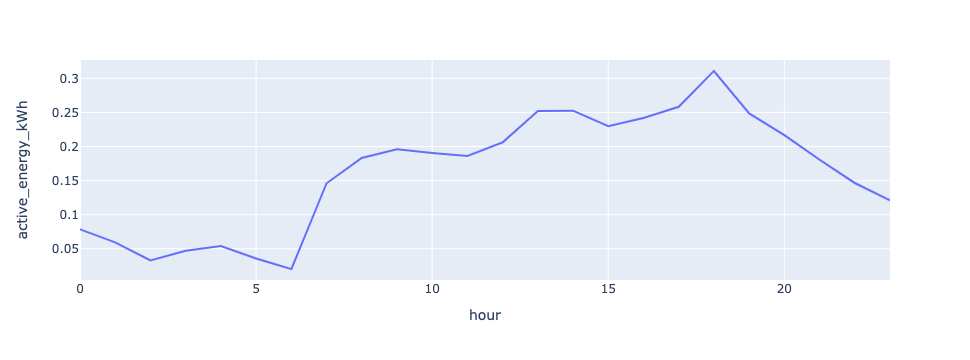

In [1086]:
px.line(df_fe.groupby(['month', 'hour'])['active_energy_kWh'].mean()[3], y='active_energy_kWh')

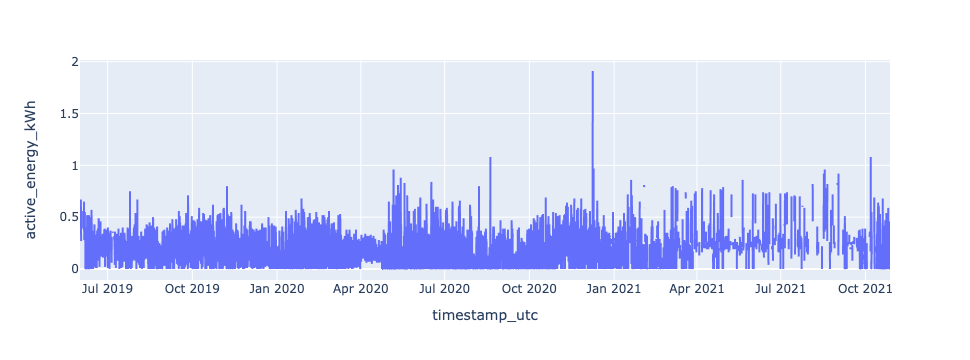

In [1087]:
px.line(df_fe, y='active_energy_kWh')#, color='month') #very relevant

In [1192]:
#px.line(df_fe, x='hour', y='active_energy_kWh', color='month_str') #very relevant

In [1090]:
df_fe.groupby(by='hour').mean().round(2).head(5) 
#then you lose the trend over the days, so I should not use this, unless I want to show the aggregated hourly behaviour
#during the day, but that dicards the change in daily behaviour over the months, weeks and months

meter_number  meter_count  voltage  current  power  power_factor  \
hour                                                                     
0.0      541926.34        85.60   219.56     0.38   0.07          0.95   
1.0      541929.26        84.65   220.58     0.36   0.07          0.95   
2.0      541933.55        82.19   222.62     0.34   0.06          0.96   
3.0      541928.29        83.06   223.48     0.33   0.06          0.96   
4.0      541927.49        74.54   223.54     0.29   0.05          0.96   

      frequency     year  month    day  minute  apparent_energy_kVAh  \
hour                                                                   
0.0       49.72  2019.71   6.98  15.83   28.08                  0.08   
1.0       49.88  2019.70   6.98  15.83   27.94                  0.07   
2.0       49.89  2019.70   6.97  15.81   28.20                  0.07   
3.0       49.91  2019.70   6.99  15.79   27.82                  0.07   
4.0       49.80  2019.69   7.02  15.84   27.98                  0.06   

      active_energy_kWh  
hour                     
0.0                0.07  
1.0                0.07  
2.0                0.06  
3.0                0.06  
4.0                0.05

In [1091]:
df_fe.groupby(by='meter_number').mean().head(5) #should I group by record_time or meter_number? 

meter_count     voltage   current     power  power_factor  \
meter_number                                                              
541806.00       73.741818  196.729091  1.818182  0.317273      0.929091   
541807.32       71.320000  202.230000  1.650000  0.320000      0.940000   
541810.00        2.300000  233.869714  0.000000       NaN           NaN   
541811.00       64.280000  237.580000  0.030000       NaN           NaN   
541811.67      184.065000  226.115000  0.175000       NaN           NaN   

              frequency    year     month        day       hour     minute  \
meter_number                                                                 
541806.00     48.055455  2019.0  7.000000   4.363636  18.727273  26.913636   
541807.32     47.330000  2019.0  7.000000   3.000000  19.000000  28.000000   
541810.00     50.239429  2021.0  2.485714  19.400000   7.914286  28.378000   
541811.00     50.290000  2021.0  2.000000  28.000000   8.000000  31.000000   
541811.67     50.305000  2021.0  4.500000  21.000000  21.000000  26.250000   

              apparent_energy_kVAh  active_energy_kWh  
meter_number                                           
541806.00                 0.358182           0.330909  
541807.32                 0.330000           0.310000  
541810.00                 0.000000                NaN  
541811.00                 0.010000                NaN  
541811.67                 0.040000                NaN

In [820]:
#df_fe2 = df_fe2.reset_index()

In [778]:
#%%time
#for index, rows in tqdm(df_fe2.iterrows()):
    #print(index,rows.values)
#    if index!=0:
#        df_fe2.loc[index, 'meter_count_diff'] = abs(df_fe2.loc[index, 'meter_count'] - 
#                                                    df_fe2.loc[index-1, 'meter_count'])

In [779]:
#for index, rows in tqdm(df_fe3.iterrows()):
#    #print(index,rows.values)
#    if index!=0:
#        df_fe3.loc[index, 'meter_count_diff'] = np.subtract(df_fe3.loc[index, 'meter_count'],
#                                                        df_fe3.loc[index-1, 'meter_count'])

In [784]:
#for index, rows in z.iterrows():
#    print(index,rows.values)
    
#for index, rows in z.iteritems():
#    if index not in seen_movies:
#        print(index,rows.values)

In [780]:
#df_fe2.to_csv('./data/data_fe.csv')

In [304]:
#df_fe2.set_index(pd.to_datetime(df_fe2['record_time']))#, unit='s') #, format='%Y/%M/%D %h%m')

In [275]:
#df_fe2.set_index('record_time')

In [305]:
#df_fe2.index

In [306]:
#df_fe2.set_index(pd.DatetimeIndex(df_fe2['record_time']))

In [307]:
#df_fe2.index

In [308]:
#df_fe2.index = pd.to_datetime(df_fe2.index, format='%Y/%M/%D %H%M')

In [309]:
#df_fe2.index

In [310]:
#df_fe2

In [ ]:
#df_fe2.resample('60Min').mean() 

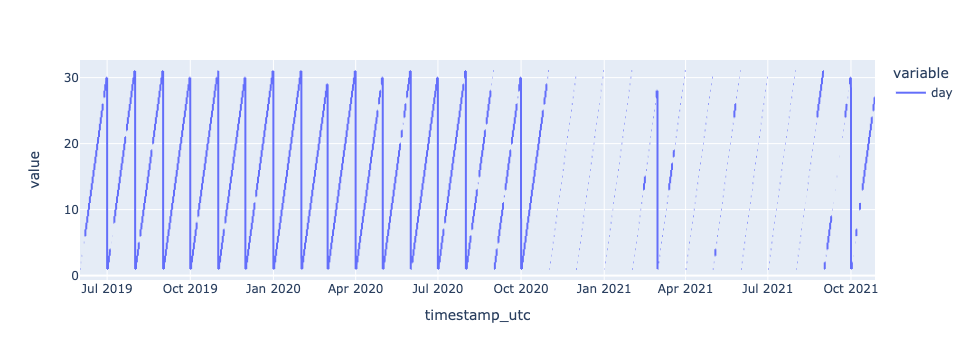

In [1142]:
px.line(df_fe['day'])

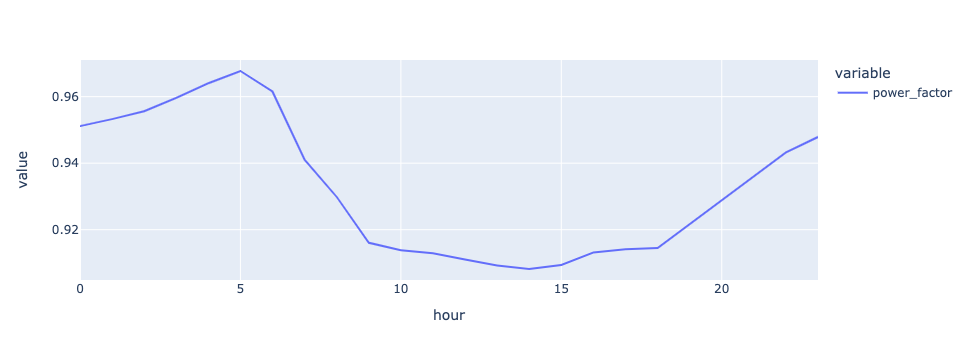

In [1094]:
px.line(df_fe.groupby(by='hour').mean()['power_factor'])

In [1193]:
df_fe.to_csv('df_fe.csv')

# Modeling

In [840]:
#project 8 has the classes 
#project 9 has LSTM

## Deep_Model Class

In [ ]:
#deep_model
class DeepModelTS():
    """
    A class to create a deep time series model
    """
    def __init__(
        self, 
        data: pd.DataFrame, 
        Y_var: str,
        lag: int,
        LSTM_layer_depth: int, 
        epochs=10, 
        batch_size=256,
        train_test_split=0
    ):

        self.data = data 
        self.Y_var = Y_var 
        self.lag = lag 
        self.LSTM_layer_depth = LSTM_layer_depth
        self.batch_size = batch_size
        self.epochs = epochs
        self.train_test_split = train_test_split

    @staticmethod
    def create_X_Y(ts: list, lag: int) -> tuple:
        """
        A method to create X and Y matrix from a time series list for the training of 
        deep learning models 
        """
        X, Y = [], []

        if len(ts) - lag <= 0:
            X.append(ts)
        else:
            for i in range(len(ts) - lag):
                Y.append(ts[i + lag])
                X.append(ts[i:(i + lag)])

        X, Y = np.array(X), np.array(Y)

        # Reshaping the X array to an LSTM input shape 
        X = np.reshape(X, (X.shape[0], X.shape[1], 1))

        return X, Y         

    def create_data_for_NN(
        self,
        use_last_n=None
        ):
        """
        A method to create data for the neural network model
        """
        # Extracting the main variable we want to model/forecast
        y = self.data[self.Y_var].tolist()

        # Subseting the time series if needed
        if use_last_n is not None:
            y = y[-use_last_n:]

        # The X matrix will hold the lags of Y 
        X, Y = self.create_X_Y(y, self.lag)

        # Creating training and test sets 
        X_train = X
        X_test = []

        Y_train = Y
        Y_test = []

        if self.train_test_split > 0:
            index = round(len(X) * self.train_test_split)
            X_train = X[:(len(X) - index)]
            X_test = X[-index:]     
            
            Y_train = Y[:(len(X) - index)]
            Y_test = Y[-index:]

        return X_train, X_test, Y_train, Y_test

    def LSTModel(self):
        """
        A method to fit the LSTM model 
        """
        # Getting the data 
        X_train, X_test, Y_train, Y_test = self.create_data_for_NN()

        # Defining the model
        model = Sequential()
        model.add(LSTM(self.LSTM_layer_depth, activation='relu', input_shape=(self.lag, 1)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')

        # Defining the model parameter dict 
        keras_dict = {
            'x': X_train,
            'y': Y_train,
            'batch_size': self.batch_size,
            'epochs': self.epochs,
            'shuffle': False
        }

        if self.train_test_split > 0:
            keras_dict.update({
                'validation_data': (X_test, Y_test)
            })

        # Fitting the model 
        model.fit(
            **keras_dict
        )

        # Saving the model to the class 
        self.model = model

        return model

    def predict(self) -> list:
        """
        A method to predict using the test data used in creating the class
        """
        yhat = []

        if(self.train_test_split > 0):
        
            # Getting the last n time series 
            _, X_test, _, _ = self.create_data_for_NN()        

            # Making the prediction list 
            yhat = [y[0] for y in self.model.predict(X_test)]

        return yhat

    def predict_n_ahead(self, n_ahead: int):
        """
        A method to predict n time steps ahead
        """    
        X, _, _, _ = self.create_data_for_NN(use_last_n=self.lag)        

        # Making the prediction list 
        yhat = []

        for _ in range(n_ahead):
            # Making the prediction
            fc = self.model.predict(X)
            yhat.append(fc)

            # Creating a new input matrix for forecasting
            X = np.append(X, fc)

            # Ommiting the first variable
            X = np.delete(X, 0)

            # Reshaping for the next iteration
            X = np.reshape(X, (1, len(X), 1))

        return yhat    

## Pipeline

In [ ]:
#pipeline

# Ploting packages
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Date wrangling
from datetime import datetime, timedelta

# Data wrangling
import pandas as pd 

# The deep learning class
from deep_model import DeepModelTS

# Reading the configuration file
import yaml

# Directory managment 
import os

# Reading the hyper parameters for the pipeline
with open(f'{os.getcwd()}\\conf.yml') as file:
    conf = yaml.load(file, Loader=yaml.FullLoader)

# Reading the data 
d = pd.read_csv('input/DAYTON_hourly.csv')
d['Datetime'] = [datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in d['Datetime']]

# Making sure there are no duplicated data
# If there are some duplicates we average the data during those duplicated days
d = d.groupby('Datetime', as_index=False)['DAYTON_MW'].mean()

# Sorting the values
d.sort_values('Datetime', inplace=True)

# Initiating the class 
deep_learner = DeepModelTS(
    data=d, 
    Y_var='DAYTON_MW',
    lag=conf.get('lag'),
    LSTM_layer_depth=conf.get('LSTM_layer_depth'),
    epochs=conf.get('epochs'),
    train_test_split=conf.get('train_test_split') # The share of data that will be used for validation
)

# Fitting the model 
model = deep_learner.LSTModel()

# Making the prediction on the validation set
# Only applicable if train_test_split in the conf.yml > 0
yhat = deep_learner.predict()

if len(yhat) > 0:

    # Constructing the forecast dataframe
    fc = d.tail(len(yhat)).copy()
    fc.reset_index(inplace=True)
    fc['forecast'] = yhat

    # Ploting the forecasts
    plt.figure(figsize=(12, 8))
    for dtype in ['DAYTON_MW', 'forecast']:
        plt.plot(
            'Datetime',
            dtype,
            data=fc,
            label=dtype,
            alpha=0.8
        )
    plt.legend()
    plt.grid()
    plt.show()   
    
# Forecasting n steps ahead   

# Creating the model using full data and forecasting n steps ahead
deep_learner = DeepModelTS(
    data=d, 
    Y_var='DAYTON_MW',
    lag=24,
    LSTM_layer_depth=64,
    epochs=10,
    train_test_split=0 
)

# Fitting the model 
deep_learner.LSTModel()

# Forecasting n steps ahead
n_ahead = 168
yhat = deep_learner.predict_n_ahead(n_ahead)
yhat = [y[0][0] for y in yhat]

# Constructing the forecast dataframe
fc = d.tail(400).copy() 
fc['type'] = 'original'

last_date = max(fc['Datetime'])
hat_frame = pd.DataFrame({
    'Datetime': [last_date + timedelta(hours=x + 1) for x in range(n_ahead)], 
    'DAYTON_MW': yhat,
    'type': 'forecast'
})

fc = fc.append(hat_frame)
fc.reset_index(inplace=True, drop=True)

# Ploting the forecasts 
plt.figure(figsize=(12, 8))
for col_type in ['original', 'forecast']:
    plt.plot(
        'Datetime', 
        'DAYTON_MW', 
        data=fc[fc['type']==col_type],
        label=col_type
        )

plt.legend()
plt.grid()
plt.show()    